Name: Lim Yu Yang Ian

Class: DAAA/FT/2A/02

Admin No: 2201874

___
# Importing modules
___

In [767]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns
import warnings
from itertools import product
from pathlib import Path
import scipy.stats as stats

# Importing tools for encoding
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from random import sample

# Importing models
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples, adjusted_rand_score, normalized_mutual_info_score, homogeneity_completeness_v_measure
from sklearn.datasets import make_blobs

# Importing other necessary modules
from numpy.random import uniform
import numpy as np
from math import isnan
from itertools import combinations

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import pickle


___
# Background Information
___

I am running a shopping mall, and would like to find my target group of customers that I would like to retain.

I have gathered data, such as Age, How Much They Spend, and Income, and will run a clustering model on it.

This is important as:
- I can better conceptualize better products and services
- Assists in framing pricing strategies
- Target advertising based on customer characteristics
- Increase customer personaliaztion
- Enhance customer satisfaction

This will help me to have a possibly increased revenue, and retain good customers for longer.

### Sources

bloomreach.com (n.d.). Customer Data Management: Gathering Customer Data | Bloomreach. [online] www.bloomreach.com. Available at: https://www.bloomreach.com/en/blog/2021/customer-data-management.

Anon, (2020). Why customer data collection is important for effective marketing strategies? - Crayon Data. [online] Available at: https://crayondata.ai/why-customer-data-collection-is-important-for-effective-marketing-strategies/ [Accessed 11 Aug. 2023].

‌Freedman, M. (2023). How Businesses Are Collecting Data (And What They’re Doing With It). [online] Business News Daily. Available at: https://www.businessnewsdaily.com/10625-businesses-collecting-data.html.

‌IJRASET (n.d.). Mall Customer Segmentation Using Clustering Algorithm. [online] www.ijraset.com. Available at: https://www.ijraset.com/research-paper/mall-customer-segmentation-using-clustering-algorithm#:~:text=Using%20clustering%2C%20identify%20segments%20of [Accessed 11 Aug. 2023].

‌

___
# Set Up
___

I am setting the random seed to 42

In [768]:
random_seed = 42
np.random.seed(42)

In [769]:
df = pd.read_csv("../ST1511-CA2-dataset/Customer_Dataset.csv")
df.head()

,CustomerID,Gender,Age,Income (k$),How Much They Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [770]:
default = (10, 5)
sns.set_style("darkgrid")

___
# EDA
___

In [771]:
df_eda = df.copy()

In [772]:
df_eda.shape

(200, 5)

In [773]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           200 non-null    int64 
 1   Gender               200 non-null    object
 2   Age                  200 non-null    int64 
 3   Income (k$)          200 non-null    int64 
 4   How Much They Spend  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


200 entries in this dataset.

Types:
- CustomerID
    - Int
- Gender
    - Object
    - This may become an issue, and categorical encoding will be needed to handle this object.
- Age
    - Int
- Income
    - Int
- How Much They Spend
    - Int

In [774]:
df_eda.describe()

,CustomerID,Age,Income (k$),How Much They Spend
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [775]:
df_eda.isna().sum()

CustomerID             0
Gender                 0
Age                    0
Income (k$)            0
How Much They Spend    0
dtype: int64

There are no Null Values, no Null value handling needs to be done

In [776]:
continous_list = ["CustomerID", "Age", "Income (k$)", "How Much They Spend"]

Dropping CustomerID as it is directly corresponding Income

In [777]:
df = df.drop(columns=["CustomerID"])
df_eda = df_eda.drop(columns=["CustomerID"])

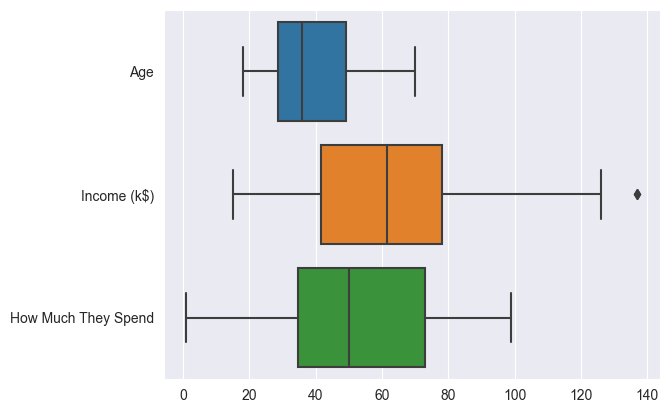

In [778]:
fig = plt.figure()
sns.boxplot(data=df_eda, orient="h")
plt.show()

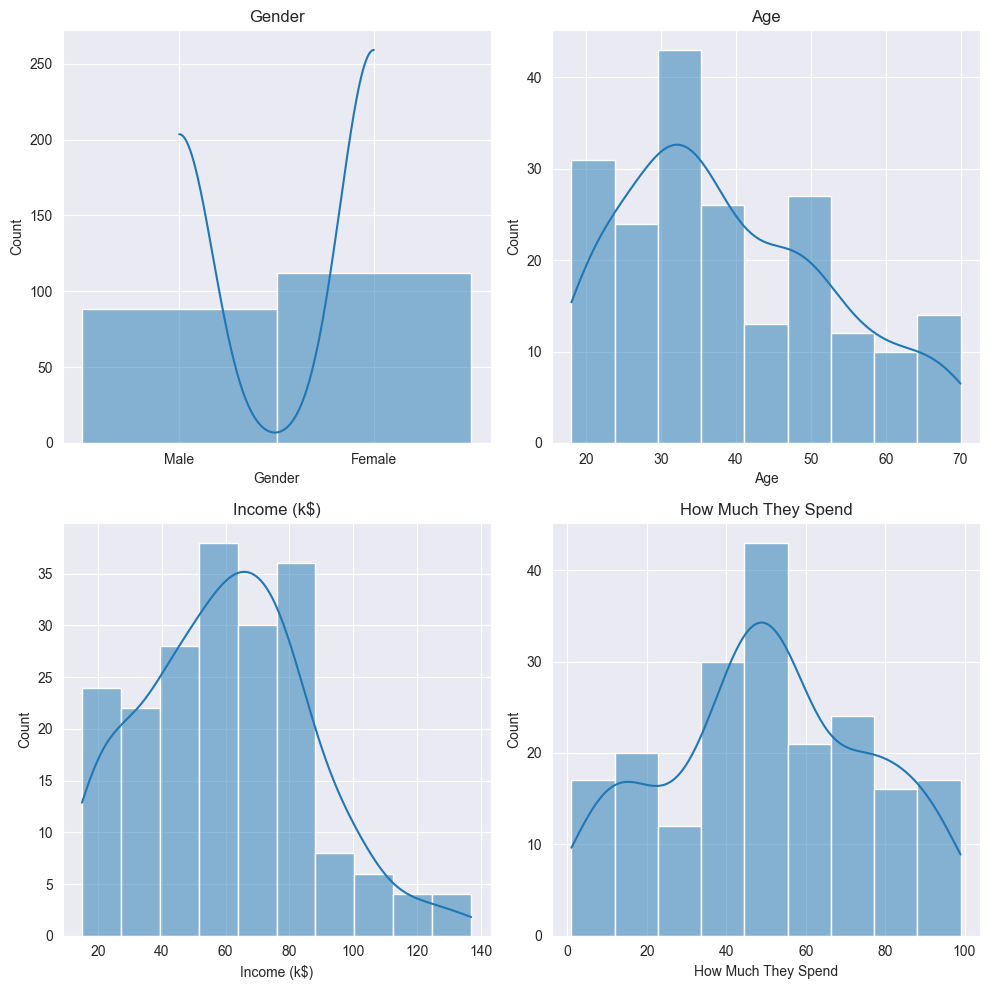

In [779]:
plt.figure(figsize=(10, 10))

columns = df_eda.columns
num_columns = len(columns)
num_rows = (num_columns + 1) // 2

for i, column in enumerate(columns):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(data=df_eda[column], kde=True)
    plt.title(column)
    plt.tight_layout()

plt.show()

### Observations:

We can see that How Much They Spend, and CustomerID is relatively normally distributed. With somewhat of a bell curved shape. 

Age and Income are skewed to the left.

<AxesSubplot: ylabel='Gender'>

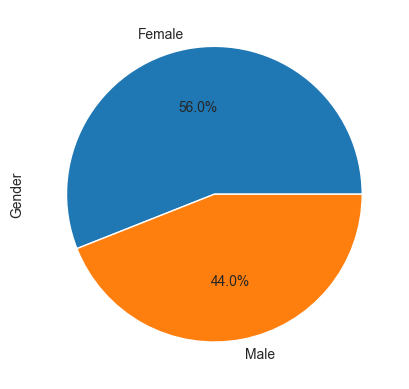

In [780]:
df_eda["Gender"].value_counts().plot.pie(
    autopct="%1.1f%%",
    explode=(0, 0)
    )

### Observations:

We can observe that there are more Females than there are Male customers

# Bivirate Analysis

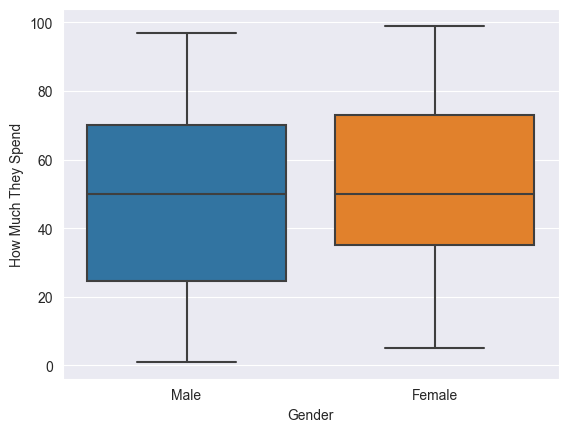

In [781]:
fig, ax = plt.subplots()
sns.boxplot(data=df_eda, x="Gender", y="How Much They Spend")
plt.show()

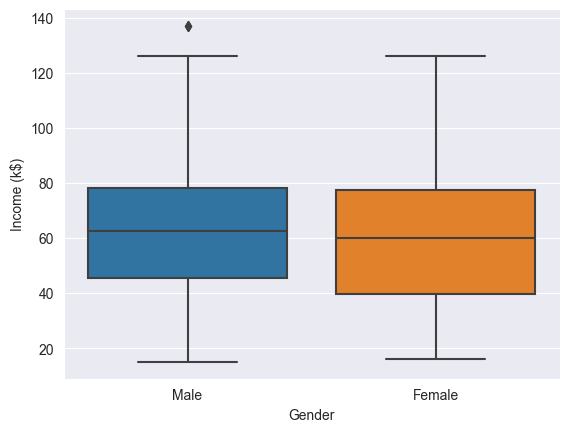

In [782]:
fig, ax = plt.subplots()
sns.boxplot(data=df_eda, x="Gender", y="Income (k$)")
plt.show()

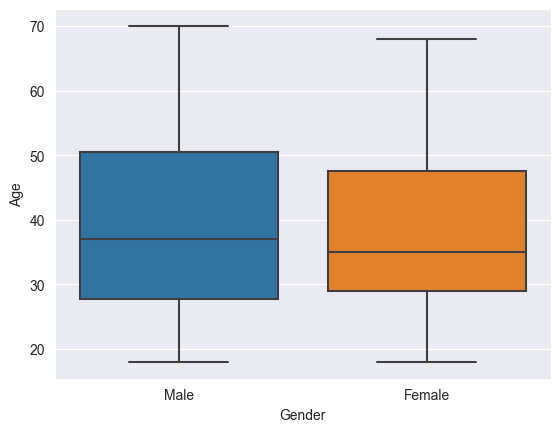

In [783]:
fig, ax = plt.subplots()
sns.boxplot(data=df_eda, x="Gender", y="Age")
plt.show()

### Observations:

We can observe that Males and Females spend about the same amout of money. However we can also observe that Females spend slightly more than Males, this is as the 25 percentile is higher.

We can observe that the Income of Males and Females is almost identical. However Males have a slightly higher mean Income.

We can observe that the Ages of Males and Females is also almost identical. However Males have a slightly higher mean Age.

Assigning the value of 1 to Male, and 0 to female

In [784]:
df_eda["Gender"] = pd.Series(
    np.where(df_eda["Gender"].values == "Male", 1, 0), df_eda.index
)

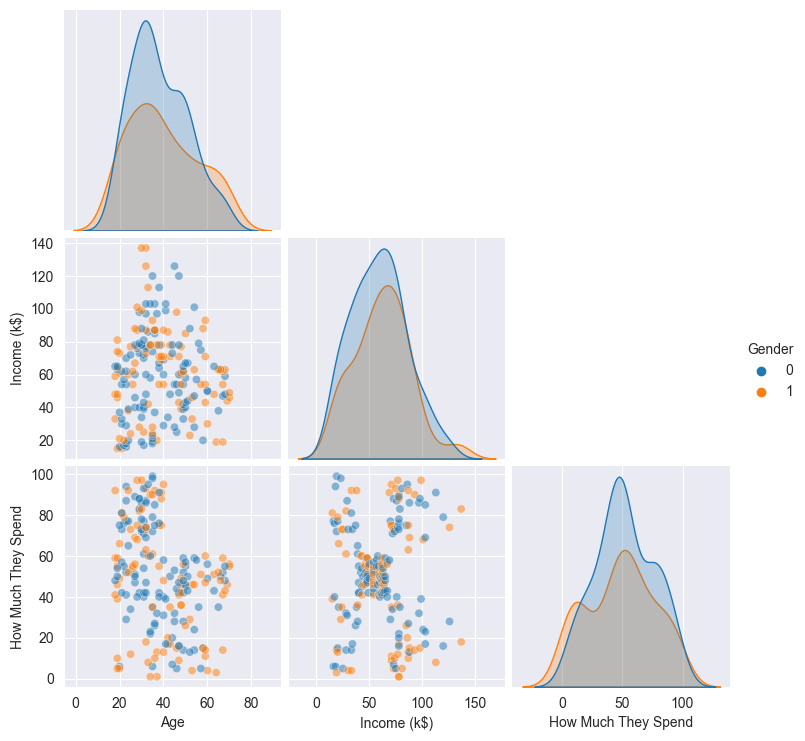

In [785]:
sns.pairplot(data=df_eda, hue="Gender", plot_kws={"alpha": 0.5}, corner=True)
plt.show()

We can see some obvious clusters forming above. Such as Income-How Much They Spend. This is a good sign of clustering.

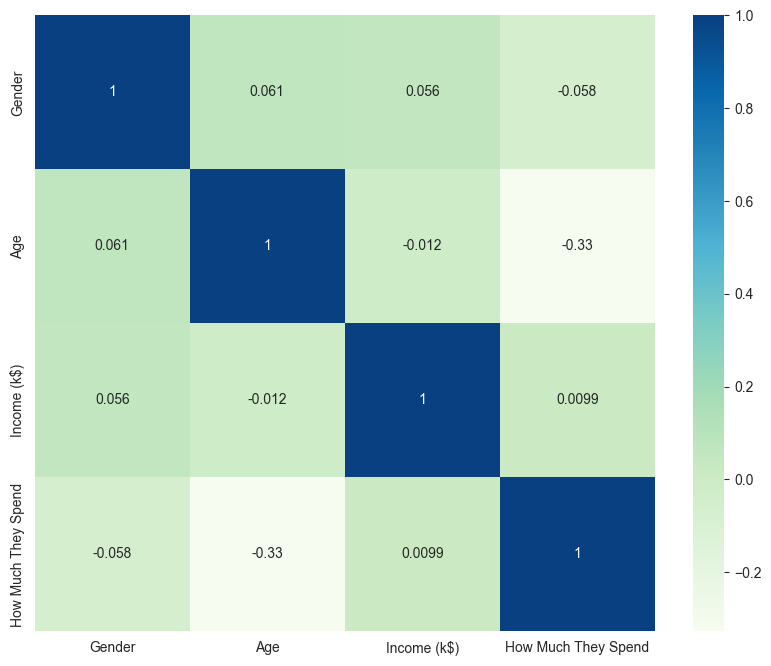

In [786]:
plt.figure(figsize=(10,8))
sns.heatmap(df_eda.corr(), annot=True, cmap="GnBu")
plt.show()

### Observation

No high correlation between any of the columns

___
# Feature Engineering
___

I will be adding the feature of ratio of spending to income.

It will be calculated via:

How Much They Spend * Income (k$) /100

This will allow me to better capture what percentage of the customers income they are willing to spend.

In [787]:
df["Ratio Of Spending-Income"] = df["How Much They Spend"] * df["Income (k$)"]/100

___
# Encoding
___

##### We have multiple choices of Encoding methods here:

1. One Hot Encoding
    - One Hot encoding has the disadvantage of creating a high-dimentional and sparse representation when dealing with large number of categories. Gender do not have many categories, only having 2, male and female. And thus this is not an issue. Thus I will use this encoding method
2. Label Encoding
    - Label encoding would introduce abitrary ordinal relationships between categories which might mislead the learning algorithm. So we will not use it.
3. Ordinal Encoding
    - It assumes uniform differences between my encoded values. Which is not the case here. Thus I will not use this encoding method.
4. Count Encoding
    - This normally results in overfitting. Even though my correlation of my target variable has a very low correlation to variables. Thus there should be no issues, however, I will use One Hot encoding as it is more suitable for this type of categorical data, and I do not want to show the frequency of my data.
5. Binary Encoding
    - It assumes that the order of my categories matters. In this case, gender, or marriage status does not have an order. Thus I will not use this encoding method.
6. Target Encoding
    - This encoding method generally leads to overfitting when there are a low number of entries in the dataset. The provided dataset has very few values. Thus I will not use this encoding method.

In [788]:
df.head()

,Gender,Age,Income (k$),How Much They Spend,Ratio Of Spending-Income
0,Male,19,15,39,5.85
1,Male,21,15,81,12.15
2,Female,20,16,6,0.96
3,Female,23,16,77,12.32
4,Female,31,17,40,6.80


In [789]:
df = pd.get_dummies(df)
df = df.drop(columns = ["Gender_Female"])
df = df.rename(columns = {"Gender_Male":"Gender"})
display(df.head())

,Age,Income (k$),How Much They Spend,Ratio Of Spending-Income,Gender
0,19,15,39,5.85,1
1,21,15,81,12.15,1
2,20,16,6,0.96,0
3,23,16,77,12.32,0
4,31,17,40,6.80,0


___
# Standardizing
___

Standardizing is to help the model compute the data with more ease, and to help ensure that the machine algorithm has different features on a similar scale.

1. Z-Score Standardization (Standard Scaler)
    - This is good for preserving the original distribution and shape.
    - Not good at handling outliers.
    - Gives Gaussian Distribution

2. Min-Max Scaling
    - Useful when wanting to preserve the relationships between data points.
    - Cannot handle outliers.
3. Unit Vector Scaling
    - Not as sensitive to outliers
    - Very useful to datasets with a lot of outliers
    - Requires Gaussian distribution
4. Unit Vector Scaling
    - Useful for sparse data
    - Does not maintain original relationships between data points


In order to identify the correct type of scaler to use, I will use the Shapiro Wilk Test, the Anderson Darling Test, a Histogram, and a Probability Plot to see whether there is Gaussian Distribution.

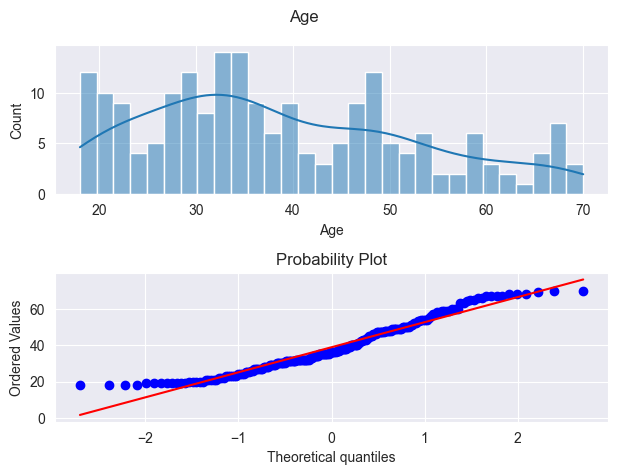

Shapiro-Wilk Test:
Statistic: 0.9516184329986572
p-value: 2.7109526854474097e-06

Anderson-Darling Test:
Statistic: 2.489094012240969
Critical Values: [0.565 0.644 0.772 0.901 1.071]


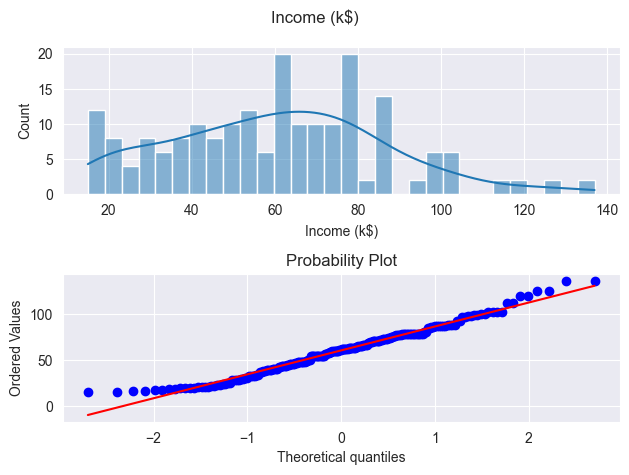

Shapiro-Wilk Test:
Statistic: 0.9783905148506165
p-value: 0.003537340322509408

Anderson-Darling Test:
Statistic: 0.6844419180561658
Critical Values: [0.565 0.644 0.772 0.901 1.071]


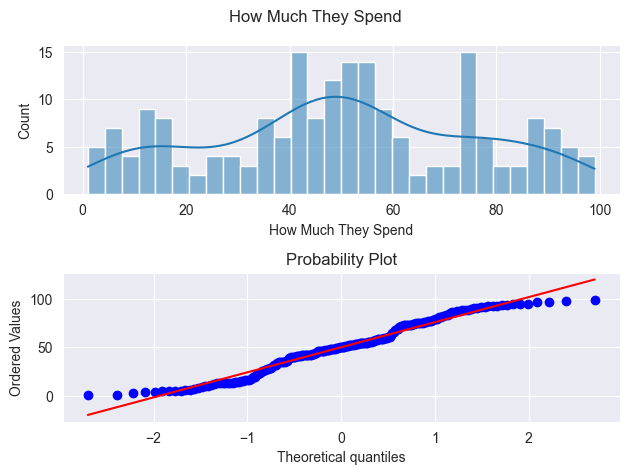

Shapiro-Wilk Test:
Statistic: 0.9694603085517883
p-value: 0.00024227304675150663

Anderson-Darling Test:
Statistic: 1.3506265307220815
Critical Values: [0.565 0.644 0.772 0.901 1.071]


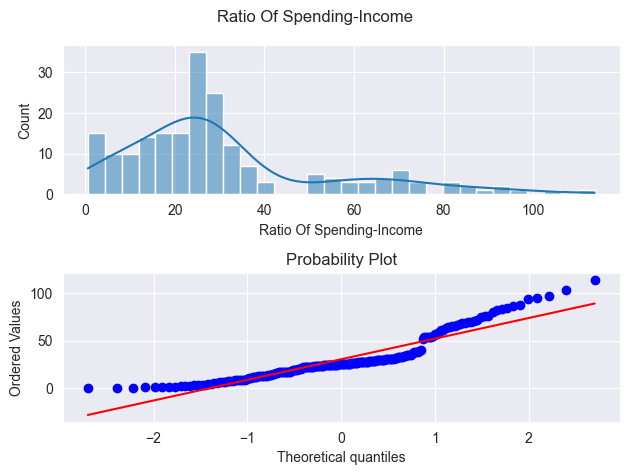

Shapiro-Wilk Test:
Statistic: 0.8680333495140076
p-value: 3.5282473557357585e-12

Anderson-Darling Test:
Statistic: 9.550438338554954
Critical Values: [0.565 0.644 0.772 0.901 1.071]


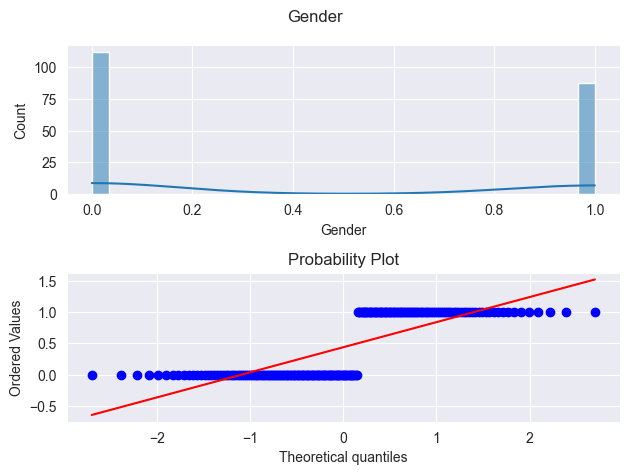

Shapiro-Wilk Test:
Statistic: 0.6311769485473633
p-value: 1.4683150575283815e-20

Anderson-Darling Test:
Statistic: 36.45581771597631
Critical Values: [0.565 0.644 0.772 0.901 1.071]


In [790]:
test_results_dic = {}
for i in df.columns:
    fig, ax = plt.subplots(2, 1)
    sns.histplot(data=df[i], bins=30, ax=ax[0], kde=True)
    stats.probplot(df[i], plot=ax[1])
    plt.suptitle(i)
    plt.tight_layout()
    plt.show()

    statistic, p_value = stats.shapiro(df[i])
    test_results_dic[i] = {}
    print("Shapiro-Wilk Test:")
    print("Statistic:", statistic)
    print("p-value:", p_value)

    result = stats.anderson(df[i])
    print("\nAnderson-Darling Test:")
    print("Statistic:", result.statistic)
    print("Critical Values:", result.critical_values)
    test_results_dic[i] = {"Anderson-Statistic": result.statistic, "Critical-Values": result.critical_values, "Shapiro-Statistic": statistic, "p-value": p_value}


In [791]:
test_results_dic_display = pd.DataFrame(test_results_dic)
display(test_results_dic_display)

,Age,Income (k$),How Much They Spend,Ratio Of Spending-Income,Gender
Anderson-Statistic,2.489094,0.684442,1.350627,9.550438,36.455818
Critical-Values,"[0.565, 0.644, 0.772, 0.901, 1.071]","[0.565, 0.644, 0.772, 0.901, 1.071]","[0.565, 0.644, 0.772, 0.901, 1.071]","[0.565, 0.644, 0.772, 0.901, 1.071]","[0.565, 0.644, 0.772, 0.901, 1.071]"
Shapiro-Statistic,0.951618,0.978391,0.96946,0.868033,0.631177
p-value,0.000003,0.003537,0.000242,0.0,0.0


### Observations:

The P-Value from the Shapiro Wilk Test will allow me to identify if the Data is normally distributed. p-value < 0.05 means it is not normally distributed.

From this, we can observe that Nothing is normally distributed, and there is no gaussian distribution present. And the P-value of Age is not below 1, and thus is not correct.

Thus I will use MINMAXSCALER() for this dataset as it is the most suitable in this situation.

In [792]:
num_cols = [
    "Age",
    "Income (k$)",
    "How Much They Spend",
    "Ratio Of Spending-Income"
]
scale = MinMaxScaler()

scaled_df_copy = df.copy()
scaled_df_copy[num_cols] = scale.fit_transform(df[num_cols])

scaled_df_copy.head()

,Age,Income (k$),How Much They Spend,Ratio Of Spending-Income,Gender
0,0.019231,0.000000,0.387755,0.046668,1
1,0.057692,0.000000,0.816327,0.102351,1
2,0.038462,0.008197,0.051020,0.003447,0
3,0.096154,0.008197,0.775510,0.103854,0
4,0.250000,0.016393,0.397959,0.055065,0


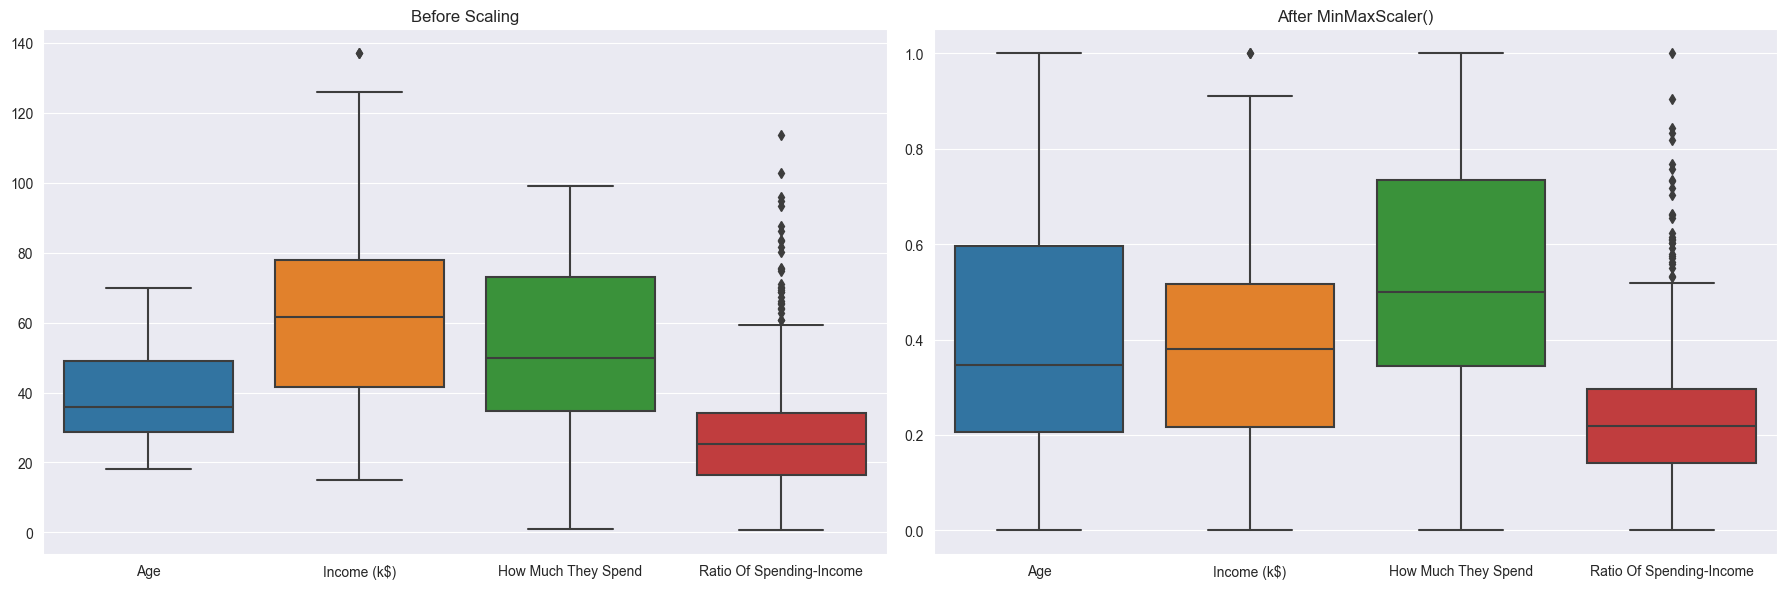

In [793]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6), tight_layout=True)
sns.boxplot(df[num_cols], ax=ax[0])
ax[0].set_title('Before Scaling')
sns.boxplot(scaled_df_copy[num_cols], ax=ax[1])
ax[1].set_title(f'After {scale}')
plt.show()

___
# Hopkins Clustering Tendency Test
___

This is a test to determine the clustering tendencies of my data.

High Hopkins Statitics:

- Value close to 1. Means that there is a high tendency of clustering. This means that the data is likely to have meaningful clusters.

Low Hopkins Statistics:

- Value close to 0. This means that there is a low tendency of clustering. This means that the data is not likely to perform well.

In [794]:
def hopkins(X):
   d = X.shape[1]
   #d = len(vars) # columns
   n = len(X) # rows
   m = int(0.1 * n) # heuristic from article [1]
   nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

   rand_X = sample(range(0, n, 1), m)

   ujd = []
   wjd = []
   for j in range(0, m):
      u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
      ujd.append(u_dist[0][1])
      w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
      wjd.append(w_dist[0][1])

   H = sum(ujd) / (sum(ujd) + sum(wjd))
   if isnan(H):
      print(ujd, wjd)
      H = 0

   return H

hopkins(scaled_df_copy)

0.8193988017080763

### Observations:

As we can see from the value 0.84 above, the hopkins statistics is above 0.84. This would mean that the data is highly clusterable, and the data has a high chance to give meaningful clusters.

___
# Dim Reduction through TSNE & Gower
___

t-SNE (t-Distributed Stochastic Neighbor Embedding):

This is a dimension reduction technique.


Gower Distance:

measures the dissimilarity or similarity between data points

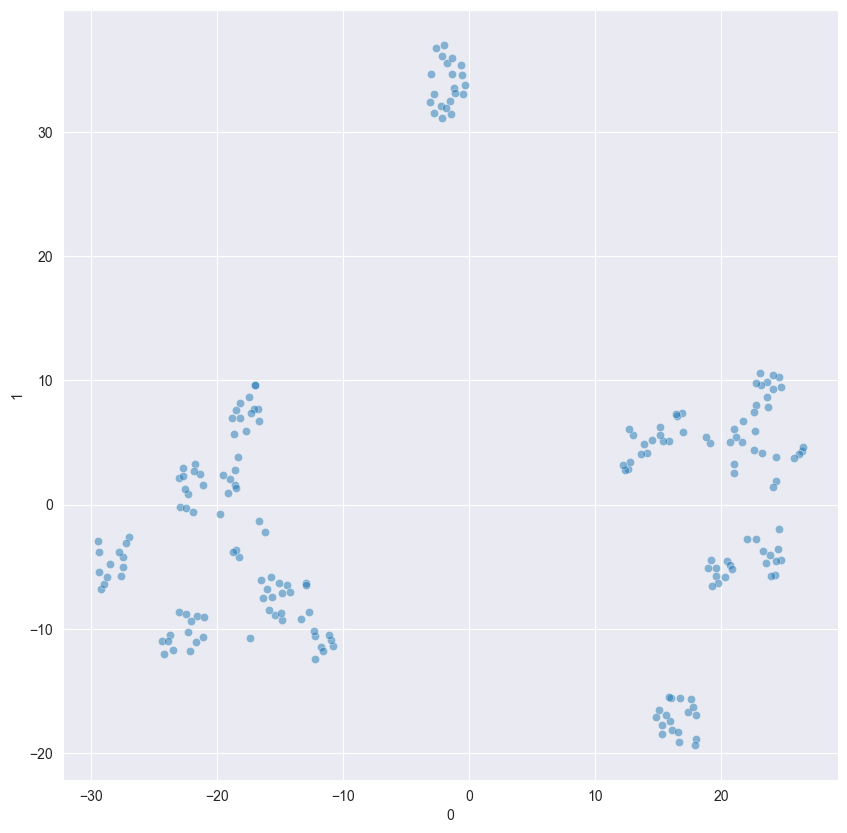

In [795]:
optimal_perplexity = round(np.sqrt(scaled_df_copy.shape[0]))

tsne = TSNE(learning_rate=50, perplexity=optimal_perplexity, random_state=42)
tsne_features = pd.DataFrame(tsne.fit_transform(scaled_df_copy))
tsne_features
demo = tsne_features.copy()

plt.figure(figsize=(10, 10))
sns.scatterplot(x=demo.iloc[:, 0], y=demo.iloc[:, 1], alpha=0.5)
plt.show()

,0,1
0,25.530056,4.903405
1,25.356323,6.820863
2,-29.164326,-8.521355
3,-21.341858,7.340529
4,-26.358719,-5.065905


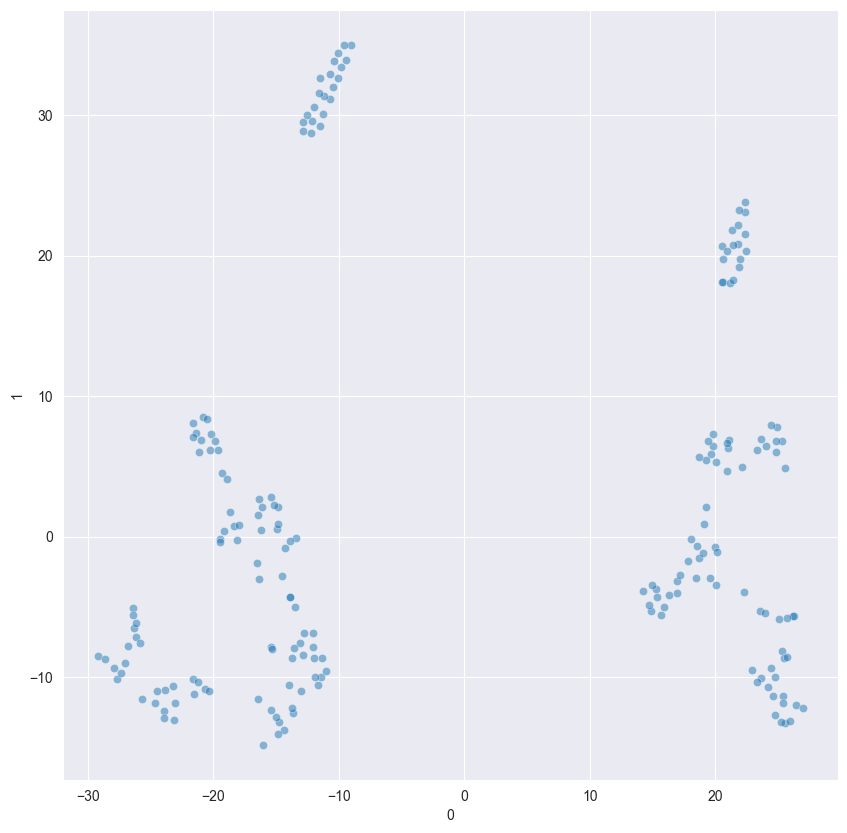

In [796]:
import gower

gower_df = gower.gower_matrix(scaled_df_copy)
gower_df = pd.DataFrame(gower_df)
gower_df

optimal_perplexity = round(np.sqrt(gower_df.shape[0]))

gower_tsne = TSNE(learning_rate=50, perplexity=optimal_perplexity, random_state=42)
gower_tsne_features = pd.DataFrame(gower_tsne.fit_transform(gower_df))
display(gower_tsne_features.head())

plt.figure(figsize=(10, 10))
sns.scatterplot(x=gower_tsne_features.iloc[:, 0], y=gower_tsne_features.iloc[:, 1], alpha=0.5)
plt.show()

scaled_df_copy = gower_tsne_features.copy()

___
# Silouette Coefficient & Inertia
___

A better Silhouette score indicates better seperation, and generally means a better model.

Inertia is the total square distance between data points. A lower inertia score indicates a better defined cluster, and generall a better model.

c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

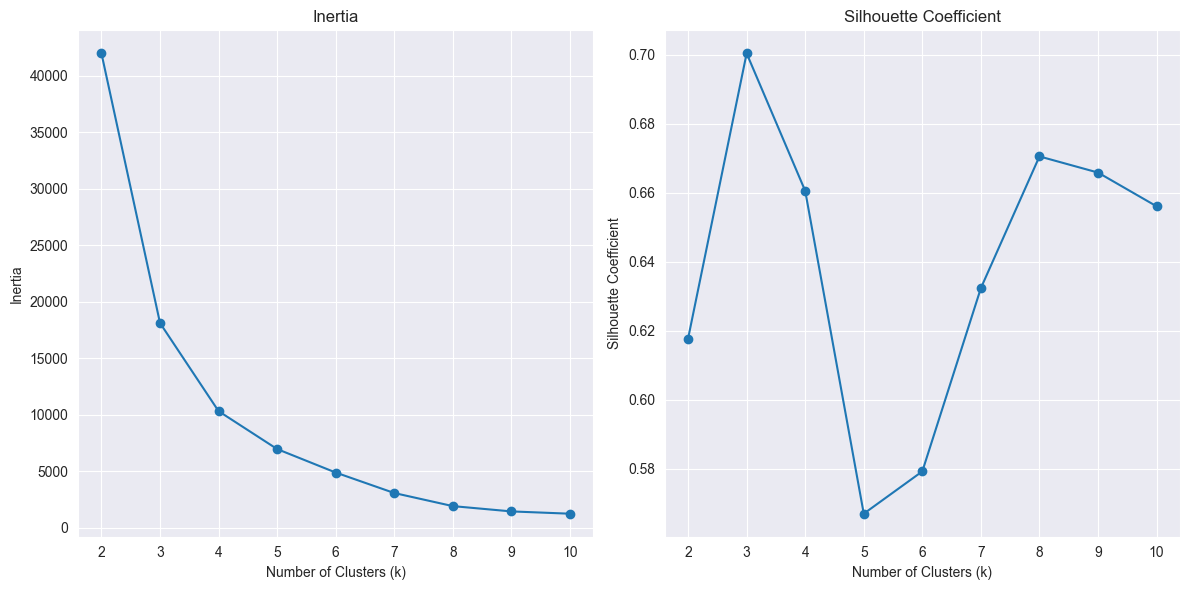

Highest Silhouette Score: 0.7004 (k = 3)


In [797]:
def visualize_kmeans_metrics(data, k_range):
    inertias = []
    silhouette_scores = []

    for k in k_range:
        modelling = KMeans(n_clusters=k, random_state=42)
        modelling.fit(data)
        inertias.append(modelling.inertia_)
        
        silhouette_scores.append(silhouette_score(data, modelling.labels_))

    plt.figure(figsize=(12, 6))
    
    # Plot Inertia
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertias, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title(f'Inertia')
    
    # Plot Silhouette Coefficient
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Coefficient')
    plt.title(f'Silhouette Coefficient')

    plt.tight_layout()
    plt.show()

    # Find the index of the highest silhouette score
    best_index = np.argmax(silhouette_scores)
    best_k = k_range[best_index]
    best_score = silhouette_scores[best_index]
    
    print(f"Highest Silhouette Score: {best_score:.4f} (k = {best_k})")

k_range = range(2, 11)  # Range of k values to explore
visualize_kmeans_metrics(scaled_df_copy, k_range)

### Observations:

We can see from the above that The Inertia decreases with the amount of clusters, whilst the Silhouette coefficient increases and peaks at 2. Then it goes down at 5, and peaks again at 8.

Even though the sillhouette score at 3 is higher that the peak at 8, 8 has a significantly lower Inertia score. Thus I will be going with 8 clusters.

In [798]:
best_k = 8

___
# Modelling
___

### For the grading of my models, I will be using the following:

- Silhouette Score:
    - The silhouette score measures the distance between the clusters and the separation between different clusters. It ranges from -1 to 1, with higher values indicating better-defined clusters.

- Davies-Bouldin Index:
    - The Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster. A lower value indicates better clustering.

- Calinski-Harabasz Index (Variance Ratio Criterion):
    - This index measures the ratio of between-cluster variance to within-cluster variance. Higher values indicate better-defined clusters.

In [799]:
def visualize_clusters(model, data, labels, column1, column2, title):
    cluster_labels = model.fit_predict(data)
    
    # Check the number of unique cluster labels
    unique_labels = len(np.unique(cluster_labels))
    if unique_labels < 2:
        print(f"Skipping calculation for {title}: Less than 2 clusters.")
        return None
    
    # Visualize clusters
    plt.scatter(data[:, column1], data[:, column2], c=cluster_labels, cmap='viridis')
    plt.title('Cluster Visualization')
    plt.xlabel(labels[column1])
    plt.ylabel(labels[column2])
    plt.title(title)
    plt.show()

    # Calculate metrics
    silhouette_avg = silhouette_score(data, cluster_labels)
    davies_bouldin = davies_bouldin_score(data, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(data, cluster_labels)

    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Davies-Bouldin Score: {davies_bouldin}')
    print(f'Calinski-Harabasz Score: {calinski_harabasz}')

    return [silhouette_avg, davies_bouldin, calinski_harabasz]


c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


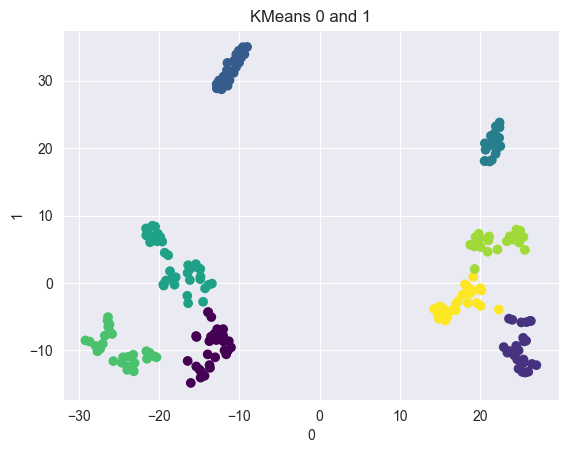

Silhouette Score: 0.6705109477043152
Davies-Bouldin Score: 0.44517252728828793
Calinski-Harabasz Score: 1637.2810201451673


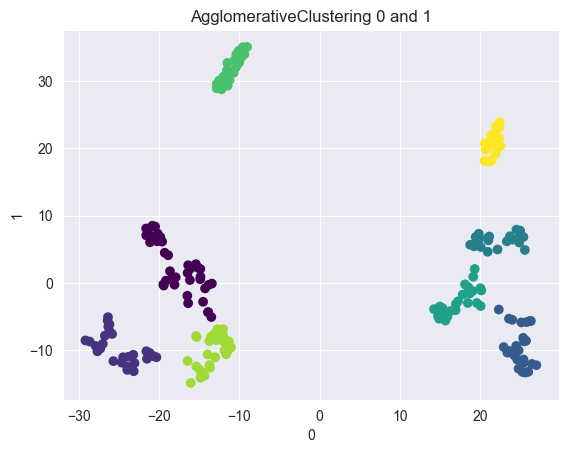

Silhouette Score: 0.6614511013031006
Davies-Bouldin Score: 0.4455741836700338
Calinski-Harabasz Score: 1535.1348479782614
Skipping calculation for DBSCAN 0 and 1: Less than 2 clusters.


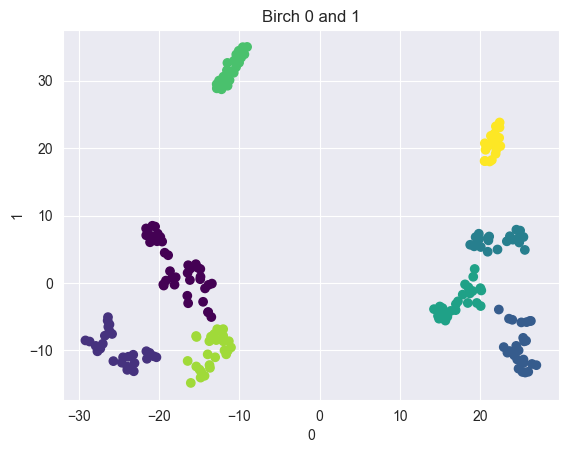

Silhouette Score: 0.6614511013031006
Davies-Bouldin Score: 0.4455741836700338
Calinski-Harabasz Score: 1535.1348479782614


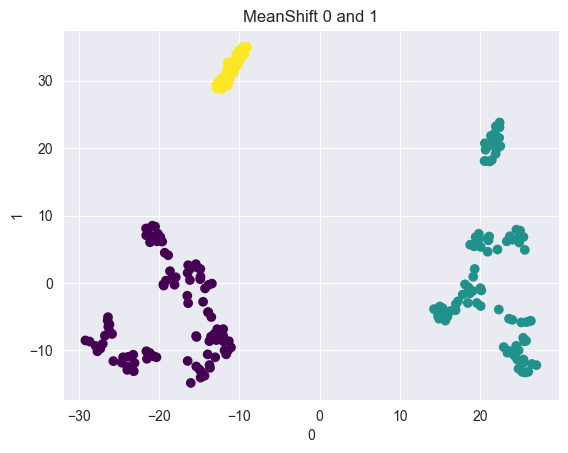

Silhouette Score: 0.7003787159919739
Davies-Bouldin Score: 0.3892884988621444
Calinski-Harabasz Score: 530.2647159878987


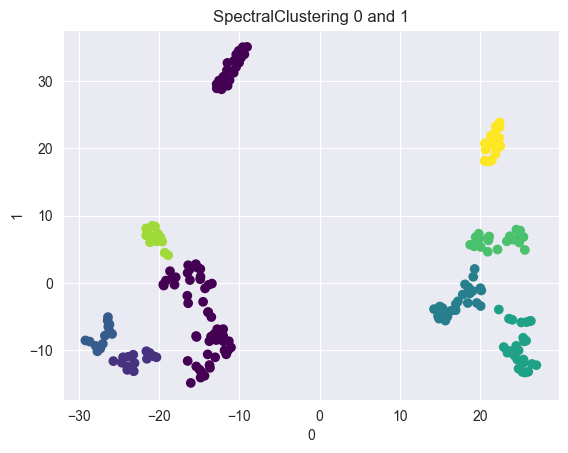

Silhouette Score: 0.31938856840133667
Davies-Bouldin Score: 1.099046875303157
Calinski-Harabasz Score: 108.87681446678361


In [800]:
models = {
    'KMeans': KMeans(n_clusters=best_k),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=best_k),
    'DBSCAN': DBSCAN(),
    'Birch': Birch(n_clusters=best_k),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=best_k)
}

# Assuming scaled_df_copy is your processed dataset
data = scaled_df_copy.values
feature_labels = scaled_df_copy.columns 

# Visualize clusters and calculate scores
model_names = []
combinations_list = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

numbers = [0, 1]

for model_name, model in models.items():
    for comb in combinations(numbers, 2):
        num1, num2 = comb
        values = visualize_clusters(model, data, feature_labels, num1, num2, model_name + " " + str(feature_labels[num1]) + " and " + str(feature_labels[num2]))
        if values is not None:
            model_names.append(model_name)
            combinations_list.append(", ".join((str(feature_labels[num1]), str(feature_labels[num2]))))
            silhouette_scores.append(values[0])
            davies_bouldin_scores.append(values[1])
            calinski_harabasz_scores.append(values[2])

DBScan did not manage to calculate, thus we will skip it

Since The Graphs are all very hard to compare, we will use the Silhoutee Score, Davies-Bouldin Score, and the Calinski-Harabasz Score in the display below

In [801]:
results_df = pd.DataFrame({
    'Model': model_names,
    'Combination': combinations_list,
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Score': davies_bouldin_scores,
    'Calinski-Harabasz Score': calinski_harabasz_scores
})

def highlight_best_worst(s, reverse=False):
    sorted_indices = s.argsort()
    if reverse:
        worst_indices = sorted_indices[-1:]
        best_indices = sorted_indices[:1]
    else:
        worst_indices = sorted_indices[:1]
        best_indices = sorted_indices[-1:]
        
    is_worst = s.index.isin(worst_indices)
    is_best = s.index.isin(best_indices)
    styles = [''] * len(s)
    
    for i, (best, worst) in enumerate(zip(is_best, is_worst)):
        if best:
            styles[i] = 'background-color: green'
        elif worst:
            styles[i] = 'background-color: red'
            
    return styles

# Apply the highlight function for 'Silhouette Score' and 'Calinski-Harabasz Score'
styled_df = results_df.style.apply(highlight_best_worst, subset=['Silhouette Score', 'Calinski-Harabasz Score'], axis=0)

# Apply the reverse highlight function for 'Davies-Bouldin Score'
styled_df_davies = results_df.style.apply(lambda x: highlight_best_worst(x, reverse=True), subset=['Davies-Bouldin Score'], axis=0)

# Combine the styles by chaining them
styled_combined_df = styled_df.apply(lambda x: highlight_best_worst(x, reverse=True), subset=['Davies-Bouldin Score'], axis=0)

# Display the combined styled DataFrame
styled_combined_df

,Model,Combination,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score
0,KMeans,"0, 1",0.670511,0.445173,1637.281020
1,AgglomerativeClustering,"0, 1",0.661451,0.445574,1535.134848
2,Birch,"0, 1",0.661451,0.445574,1535.134848
3,MeanShift,"0, 1",0.700379,0.389288,530.264716
4,SpectralClustering,"0, 1",0.319389,1.099047,108.876814


### Observations:

Spectral Clustering has the worse scores on all 3 metrics

Mean Shift has the best Silhouette and Davies Bouldin Score

KMeans has the best calinkski harabasz score

I will continue with the top 3 performing models:
1. Mean Shift
2. KMeans
3. Agglomerative Clustering

___
# Hyper Tuning
___

In [802]:
scoring_results = {}

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

### KMeans Hyper Parameter Tuning

In [803]:
#KMeans Param Grid
param_grid = {
    'n_clusters': [best_k],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500],
    'n_init': [10, 20, 30]
}

# Create an instance of KMeans and GridSearchCV
model = KMeans(random_state=random_seed)
km_grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1)

km_grid_search.fit(scaled_df_copy)

print("Best Parameters:", km_grid_search.best_params_)
print("Best Score:", km_grid_search.best_score_)

scoring_results['KMeans'] = {"best params": km_grid_search.best_params_, "best score": km_grid_search.best_score_}

Best Parameters: {'init': 'random', 'max_iter': 100, 'n_clusters': 8, 'n_init': 20}
Best Score: 0.61160329580307


In [804]:
# meanshift param grid
param_grid = {
    'bandwidth': np.arange(1, 5)
}

# Create GridSearchCV instance
ms_grid_search = GridSearchCV(MeanShift(), param_grid, cv=5, scoring=silhouette_scorer)

# Fit the GridSearchCV instance on your data
ms_grid_search.fit(scaled_df_copy)

# Print the best parameters and best score
print("Best Bandwidth:", ms_grid_search.best_params_['bandwidth'])
print("Best Score:", ms_grid_search.best_score_)

scoring_results["MeanShift"] = {"best params": ms_grid_search.best_params_, "best score": ms_grid_search.best_score_}

Best Bandwidth: 4
Best Score: 0.8004251599311829


In [805]:
# agglomerative clustering param grid
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],  # Number of clusters to search
    'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'],  # Distance metric
    'linkage': ['ward', 'complete', 'average', 'single']  # Linkage criterion
}
# Create GridSearchCV instance
agc_grid_search = GridSearchCV(AgglomerativeClustering(), param_grid, cv=5, scoring=silhouette_scorer)

# Fit the GridSearchCV instance on your data
agc_grid_search.fit(scaled_df_copy)

# Print the best parameters and best score
print("Best Bandwidth:", agc_grid_search.best_params_)
print("Best Score:", agc_grid_search.best_score_)

scoring_results["Agglomerative Clustering"] = {"best params": agc_grid_search.best_params_, "best score": agc_grid_search.best_score_}

c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warning

Best Bandwidth: {'affinity': 'l1', 'linkage': 'average', 'n_clusters': 4}
Best Score: 0.8030431866645813


c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warning

### Observations:

As the values are very hard to compare, I will compare it in a datafram.

In [806]:
scoring_results_df = pd.DataFrame(scoring_results).transpose()
display(scoring_results_df)

,best params,best score
KMeans,"{'init': 'random', 'max_iter': 100, 'n_cluster...",0.611603
MeanShift,{'bandwidth': 4},0.800425
Agglomerative Clustering,"{'affinity': 'l1', 'linkage': 'average', 'n_cl...",0.803043


As Mean Shift has the highest Silhouette Score, we will proceded with this as my final model.

In [807]:
ms_grid_search.best_estimator_

MeanShift(bandwidth=4)

In [808]:
df.head()

,Age,Income (k$),How Much They Spend,Ratio Of Spending-Income,Gender
0,19,15,39,5.85,1
1,21,15,81,12.15,1
2,20,16,6,0.96,0
3,23,16,77,12.32,0
4,31,17,40,6.80,0


In [809]:
display(scaled_df_copy)

,0,1
0,25.530056,4.903405
1,25.356323,6.820863
2,-29.164326,-8.521355
3,-21.341858,7.340529
4,-26.358719,-5.065905
...,...,...
195,-9.579633,34.984413
196,-23.148911,-13.094862
197,21.924158,23.237099
198,26.964005,-12.192602


#### Exporting model

In [810]:
best_bandwidth = 4
meanshift_model = MeanShift(bandwidth=best_bandwidth)
meanshift_model.fit(scaled_df_copy)

pickle.dump(meanshift_model, open("../Saved_models/Clustering CA2.p", "wb"))
meanshift_model = pickle.load(open("../Saved_models/Clustering CA2.p", "rb"))

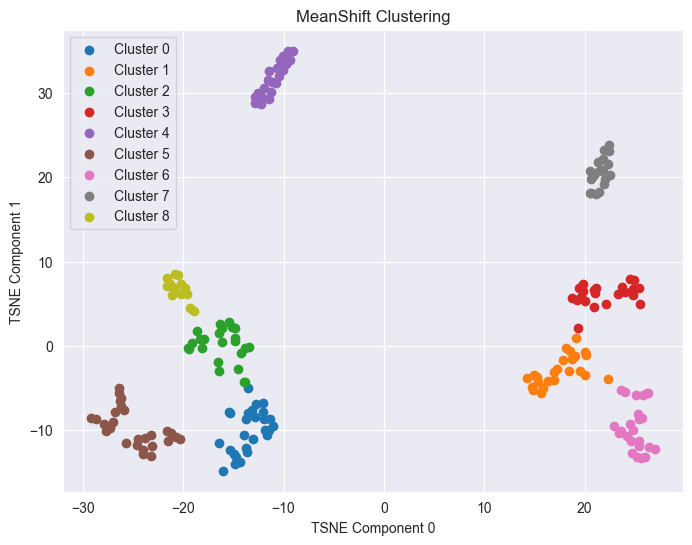

In [811]:
# Get the cluster labels assigned by the model
cluster_labels = meanshift_model.labels_

# Get unique cluster labels
unique_labels = np.unique(cluster_labels)

# Visualize the clusters using scatter plots and a legend
plt.figure(figsize=(8, 6))

for label in unique_labels:
    cluster_points = scaled_df_copy[cluster_labels == label]
    plt.scatter(cluster_points[0], cluster_points[1], label=f'Cluster {label}')

plt.title('MeanShift Clustering')
plt.xlabel('TSNE Component 0')
plt.ylabel('TSNE Component 1')
plt.legend()
plt.show()

In [812]:
df_final = df.copy()

df_final["cluster"] = cluster_labels

In [813]:
df_final#[cluster_labels == 3]

,Age,Income (k$),How Much They Spend,Ratio Of Spending-Income,Gender,cluster
0,19,15,39,5.85,1,3
1,21,15,81,12.15,1,3
2,20,16,6,0.96,0,5
3,23,16,77,12.32,0,8
4,31,17,40,6.80,0,5
...,...,...,...,...,...,...
195,35,120,79,94.80,0,4
196,45,126,28,35.28,0,5
197,32,126,74,93.24,1,7
198,32,137,18,24.66,1,6


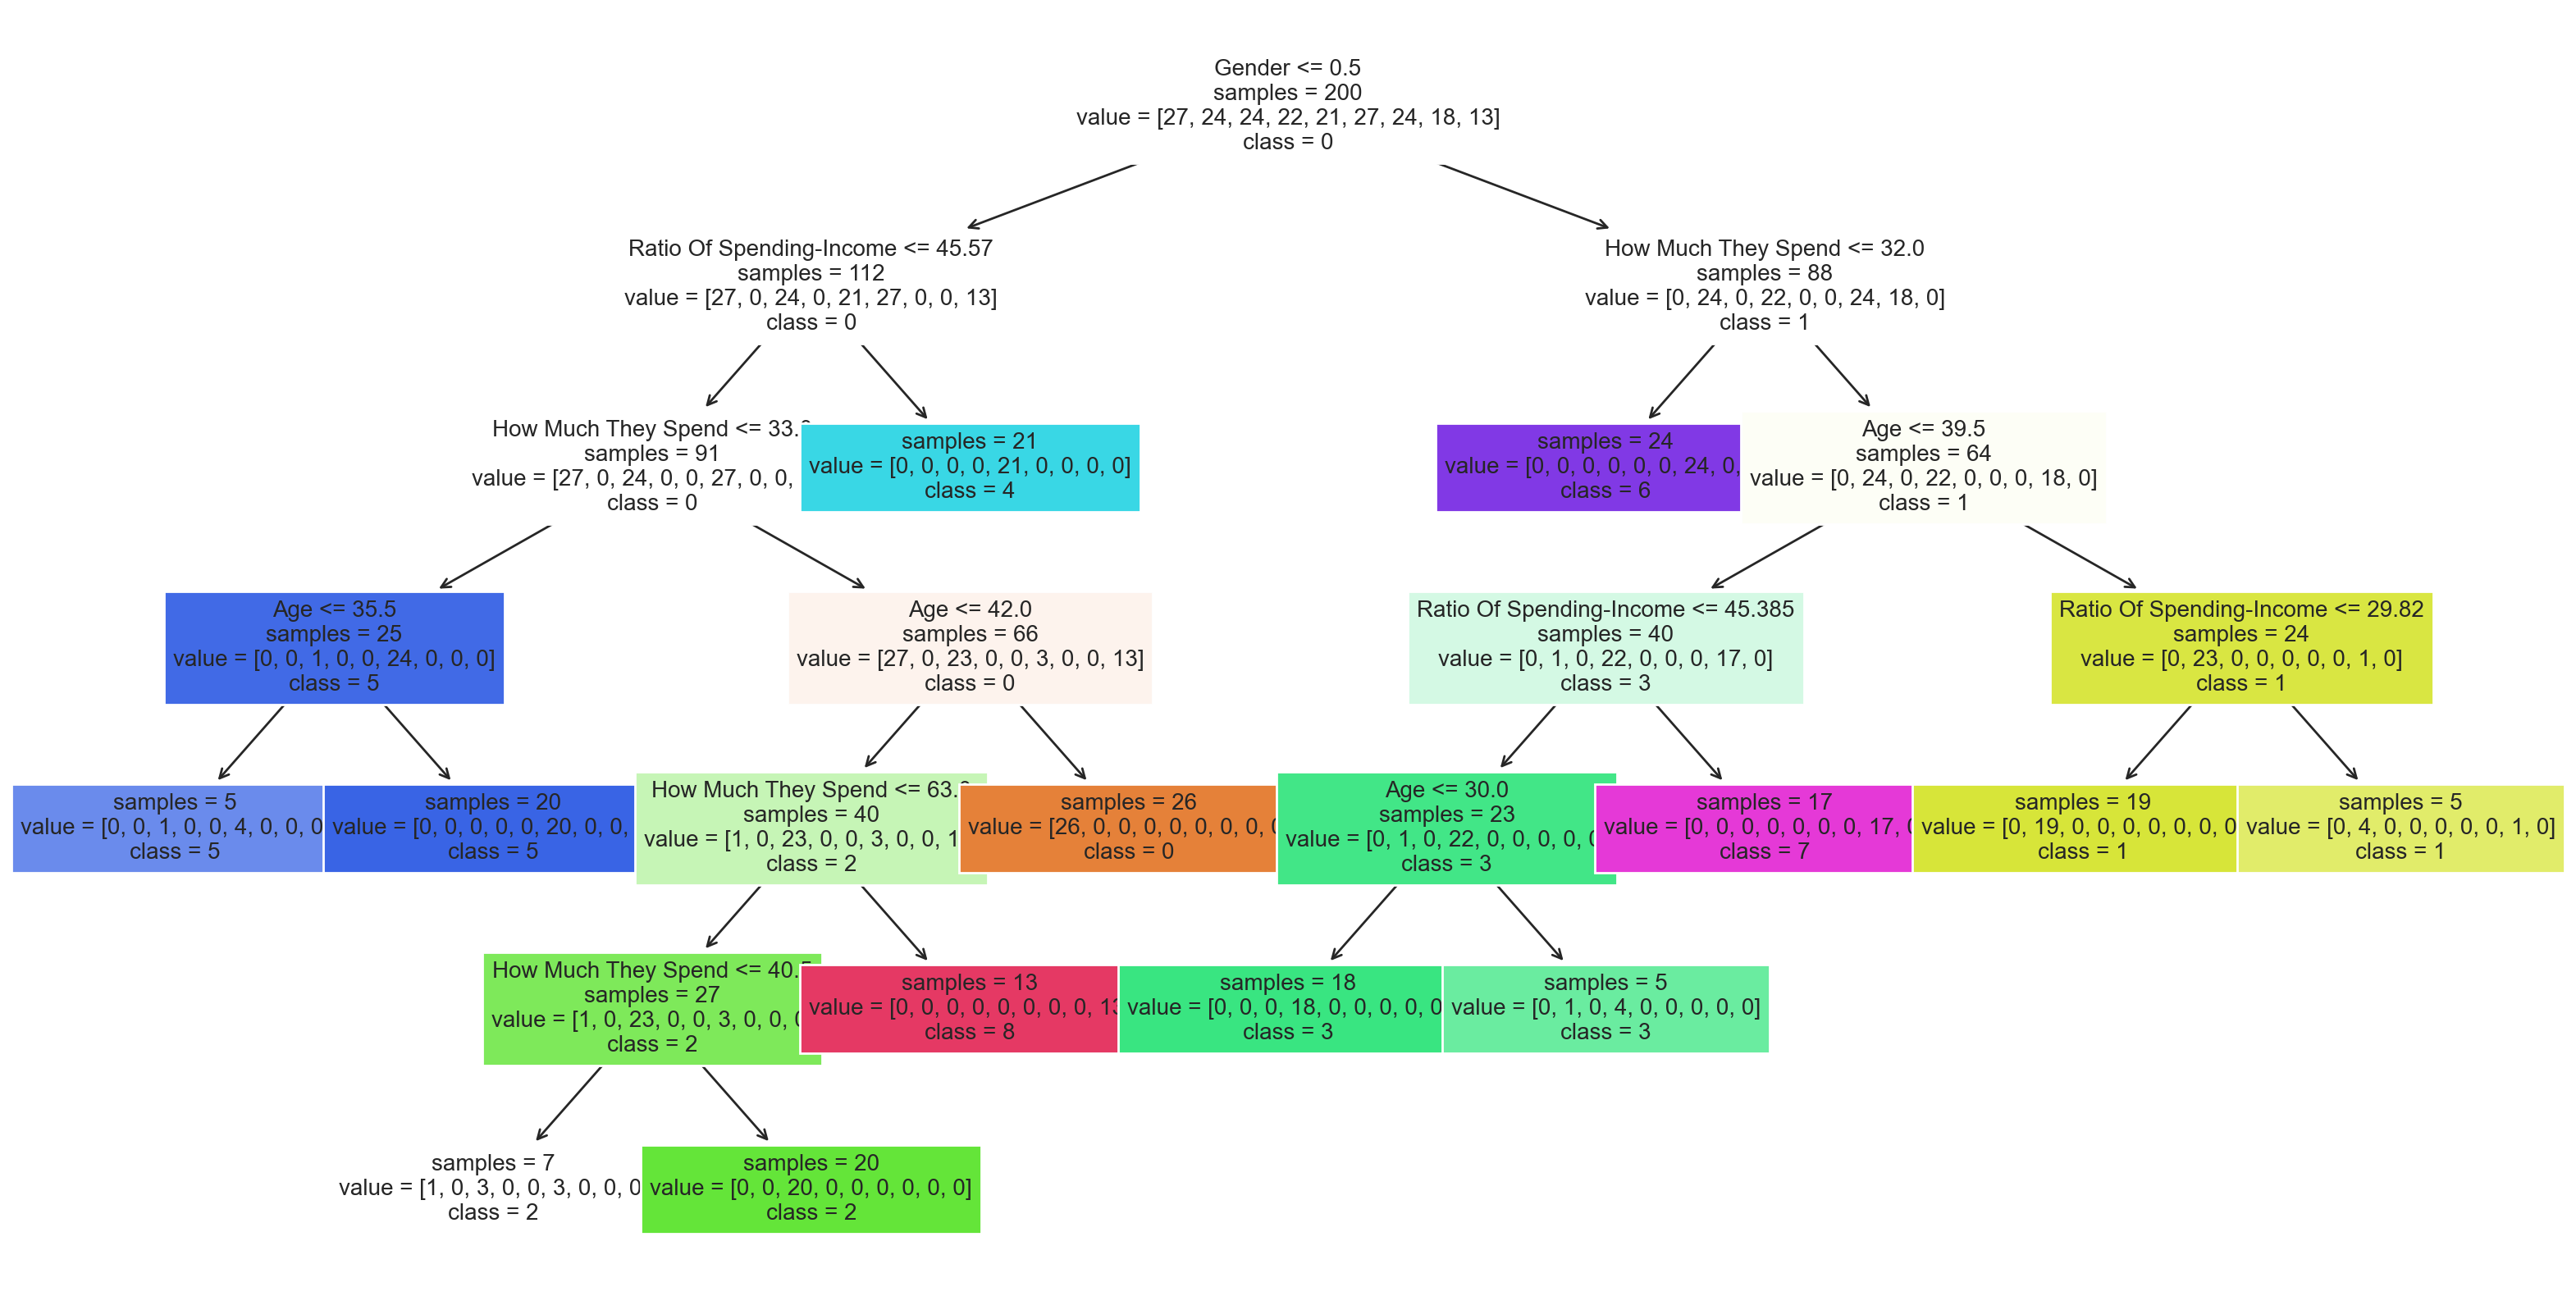

In [814]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_leaf=5)
clf.fit(df_final.drop(columns="cluster"), df_final["cluster"])

fig, ax = plt.subplots(figsize=(20, 10), dpi=200)
plot_tree(
    clf,
    feature_names=df_final.drop(columns="cluster").columns,
    class_names=np.unique(df_final["cluster"].values.astype(str)),
    impurity=False,
    filled=True,
    ax=ax,
    fontsize=10, 
)
plt.show()

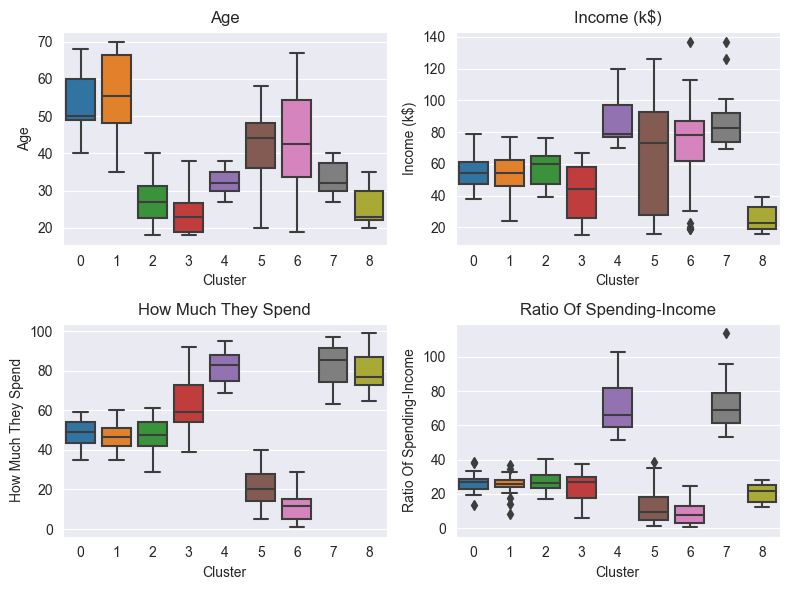

In [815]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

# Boxplot for Age distribution across clusters
sns.boxplot(data=df_final, x="cluster", y="Age", ax=ax[0, 0])
ax[0, 0].set_xlabel('Cluster')
ax[0, 0].set_ylabel('Age')
ax[0, 0].set_title('Age') 

# Boxplot for Age distribution across clusters
sns.boxplot(data=df_final, x="cluster", y="Income (k$)", ax=ax[0, 1])
ax[0, 1].set_xlabel('Cluster')
ax[0, 1].set_ylabel('Income (k$)')
ax[0, 1].set_title('Income (k$)') 

# Boxplot for Age distribution across clusters
sns.boxplot(data=df_final, x="cluster", y="How Much They Spend", ax=ax[1, 0])
ax[1, 0].set_xlabel('Cluster')
ax[1, 0].set_ylabel('How Much They Spend')
ax[1, 0].set_title('How Much They Spend') 

# Boxplot for Age distribution across clusters
sns.boxplot(data=df_final, x="cluster", y="Ratio Of Spending-Income", ax=ax[1, 1])
ax[1, 1].set_xlabel('Cluster')
ax[1, 1].set_ylabel('Ratio Of Spending-Income')
ax[1, 1].set_title('Ratio Of Spending-Income') 

plt.tight_layout()
plt.show()

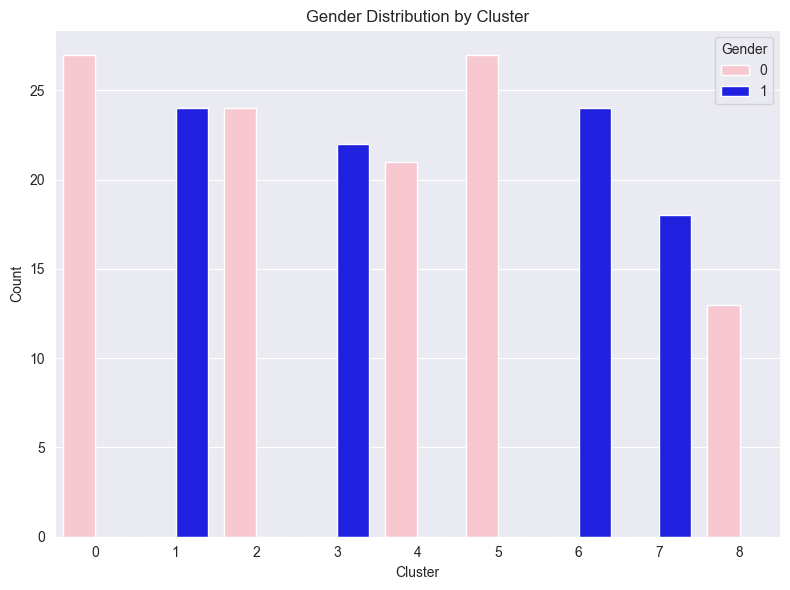

In [816]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(8, 6))

# Create the countplot with different colors by gender
ax = sns.countplot(data=df_final, x="cluster", hue="Gender", palette={0: "pink", 1: "blue"})

# Sort cluster labels and set x-axis tick labels
cluster_labels = sorted(df_final["cluster"].unique())
plt.xticks(range(len(cluster_labels)), cluster_labels)

# Set labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Gender Distribution by Cluster')

plt.legend(title='Gender')

plt.tight_layout()
plt.show()


___
# Cluster Interpretation
___

0. Female Ageing middle spenders:
    - Age range from 40 - 68
    - Middle Income of 40 - 80
    - Middle Spending 38 - 60
    - Middle Ratio Of Spending-Income
    
1. Male Ageing middle spenders:
    - Age Range from 35 - 70
    - Middle Income 25 - 80
    - Middle Spending 38 - 60
    - Middle Ratio Of Spending-Income

2. Female Youth middle spenders:
    - Younger Age range 15 - 40
    - Middle Income of 40 - 80
    - Middle Spending of 30 - 60
    - Middle Ratio Of Spending-Income

3. Male Youth Impulsive Spenders:
    - Younger Age range 15 - 38
    - Low Income of 10 - 70
    - High Spending range of 40 - 94
    - Low Ratio Of Spending-Income

4. Female Middle Aged High Ballers:
    - Middle Age range from 28 - 38
    - High Income range 70 - 120
    - High Spending range of 70 - 95
    - High Ratio Of Spending-Income

5. Female Thrifts:
    - Wide Age range of 20 - 58
    - Wide Income range of 15 - 128
    - Low Spending range of 7 - 40
    - Low Ratio Of Spending-Income

6. Male Thrifts:
    - Wide Age range of 20 - 68
    - Wide Income range of 10 - 128
    - Low Spending range of 0 - 30
    - Low Ratio Of Spending-Income

7. Male Middle Aged High Ballers:
    - Middle Age range of 28 - 40
    - High Income range of 70 - 100
    - High Income range of 60 - 98
    - High Ratio Of Spending-Income

8. Female Youth Impulsive Spenders:
    - Young Age range of 20 - 35
    - Low Income range of 15 - 40
    - High Spending range of 64 - 100
    - Middle Ratio Of Spending-Income

___
# Conclusion
___

To conclude, we have successfully made a clustering model, with a Silhouette Score of 0.80, which is very good.

I resulted in having clusters 0-8, 9 in total.

My clusters are either all female or male. And aside from Cluster 2, all other clusters have a mirror cluster with similar characteristics, but the opposite gender.

Of all groups, the groups I would like to retain the most are groups 7 and 4. These are the middle aged high spender high earners. These people are willinng to spend a lot of money at my mall, and are earning a high income.

This group has shown that they are already loyal customers with the money to spend too. On top of this, they are middle aged, and will be able to continue shopping, or may bring their children, possibly causing us to have more loyal customers.

After clusters 7, 4 the best next clusters to target are 1, and 2.

Cluster 2 have a middle Income, however, more can be done to target them so that they are more willing to interact with the mall and purchase more products. 

I think some of the things to make them spend more are:
- Targetted advertising
- More budget options
- Discounts

This will allow my mall to possibly garner more loyal customers.